In [15]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

### Читаем данные, добавлем хедер

In [17]:
data = pd.read_csv('scoring_approval_data.csv', header=None, na_values='?')
data.columns = ['F{}'.format(i) for i in xrange(1, 16)] + ['class']
data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


### Смотрим статистики для количественных и номинальных признаков

In [19]:
data.describe()

,F2,F3,F8,F11,F14,F15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [20]:
data.describe(include=['object'])

,F1,F4,F5,F6,F7,F9,F10,F12,F13,class
count,678,684,684,681,681,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,468,519,519,137,399,361,395,374,625,383


### Выделяем столбцы с количественными и номинальными признаками

In [21]:
categorical_columns = list(data.select_dtypes(include=['object']).columns)
numeric_columns = list(data.select_dtypes(exclude=['object']).columns)
print categorical_columns
print numeric_columns

['F1', 'F4', 'F5', 'F6', 'F7', 'F9', 'F10', 'F12', 'F13', 'class']
['F2', 'F3', 'F8', 'F11', 'F14', 'F15']


### Смотрим на данные

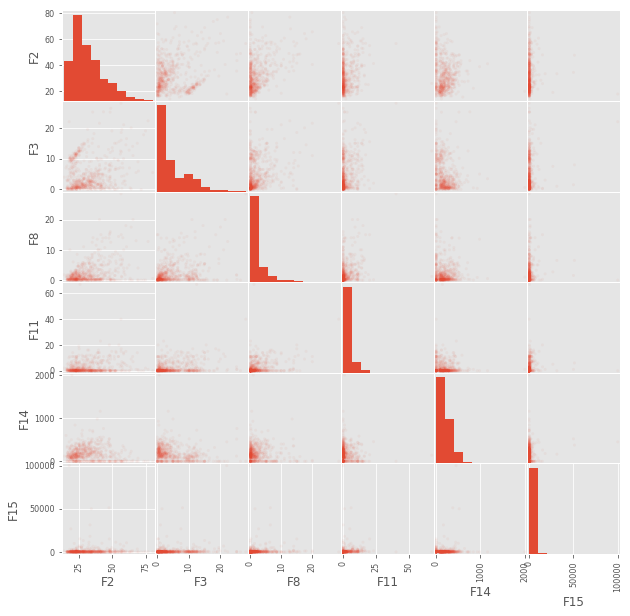

In [16]:
scatter_matrix(data, alpha=0.05, figsize=(10, 10));

In [22]:
data.corr()

,F2,F3,F8,F11,F14,F15
F2,1.000000,0.202317,0.395751,0.185912,-0.079812,0.018553
F3,0.202317,1.000000,0.298902,0.271207,-0.224242,0.123121
F8,0.395751,0.298902,1.000000,0.322330,-0.077163,0.051345
F11,0.185912,0.271207,0.322330,1.000000,-0.120096,0.063692
F14,-0.079812,-0.224242,-0.077163,-0.120096,1.000000,0.066853
F15,0.018553,0.123121,0.051345,0.063692,0.066853,1.000000


### Строим диаграммы рассеяния для каждой пары количественных признаков

In [27]:
from itertools import combinations

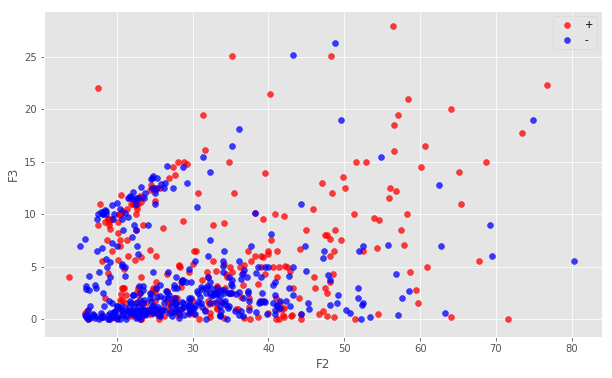

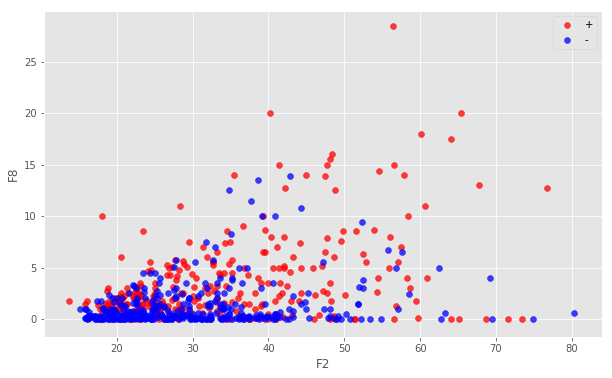

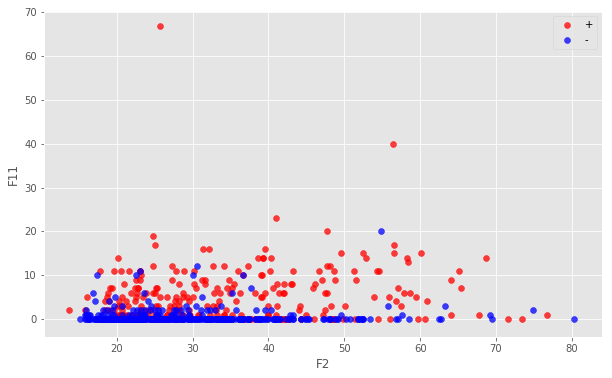

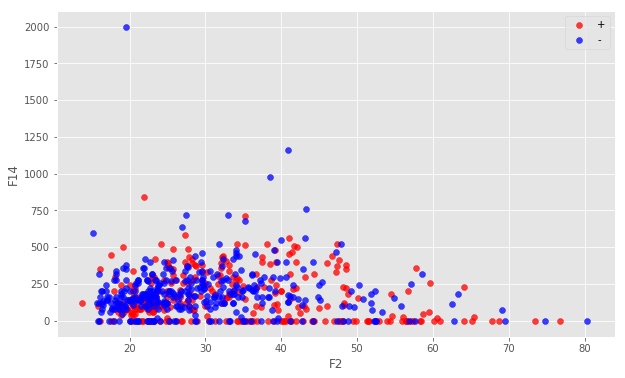

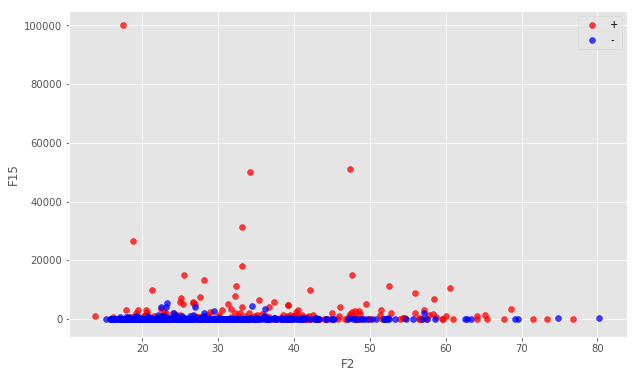

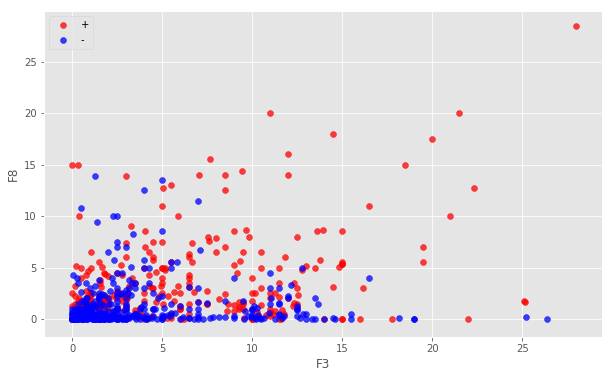

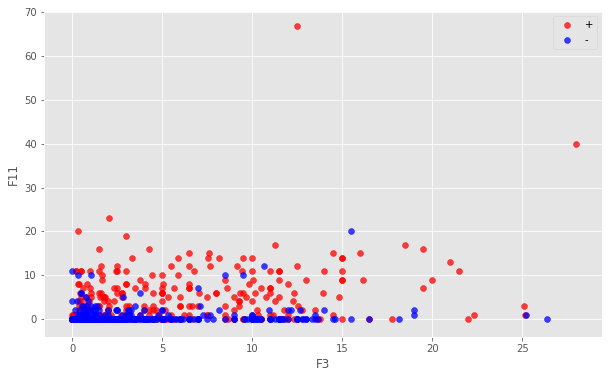

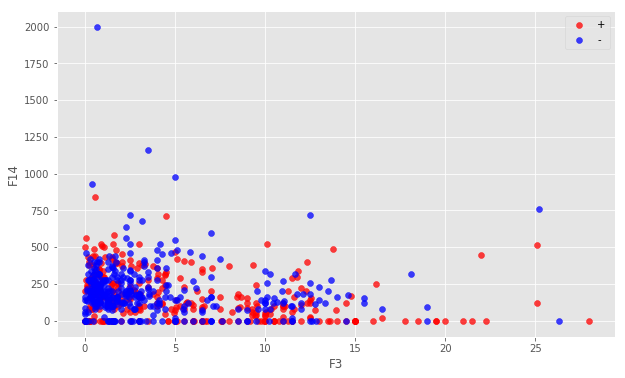

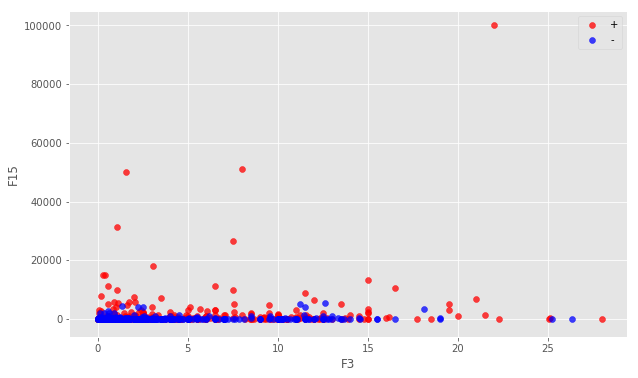

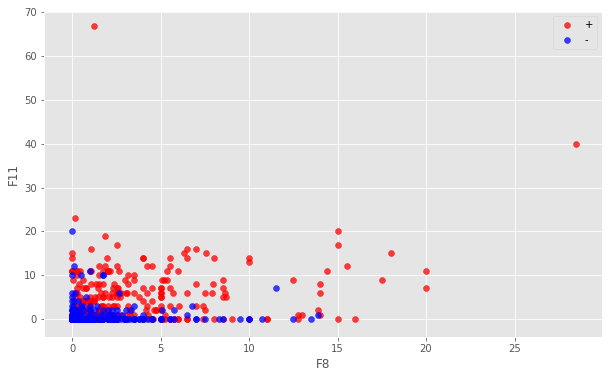

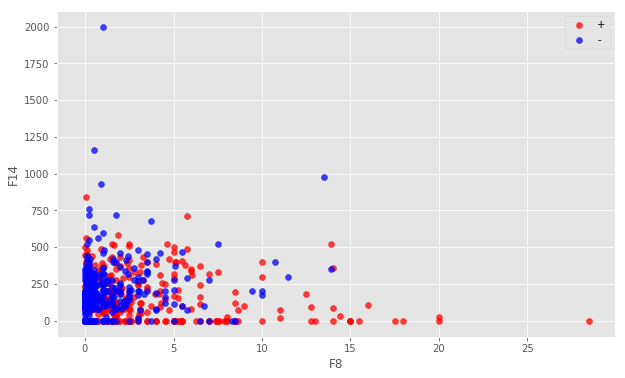

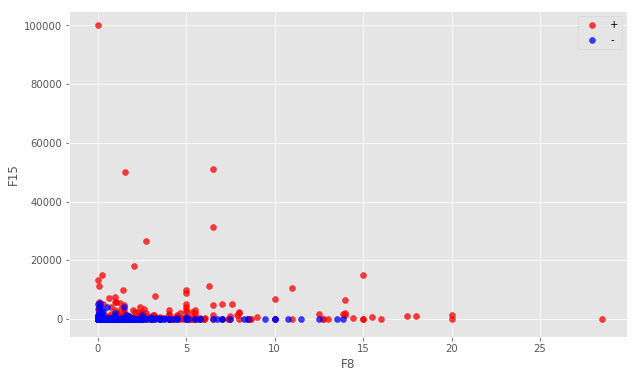

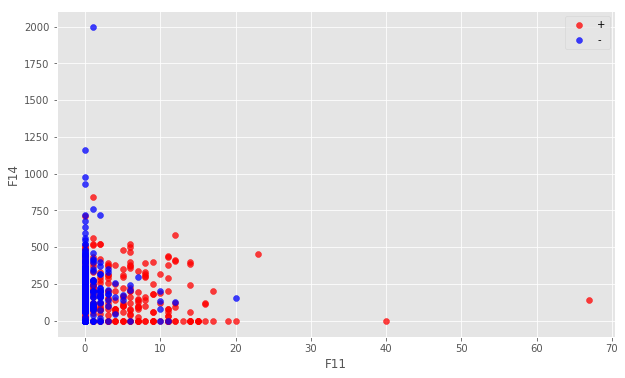

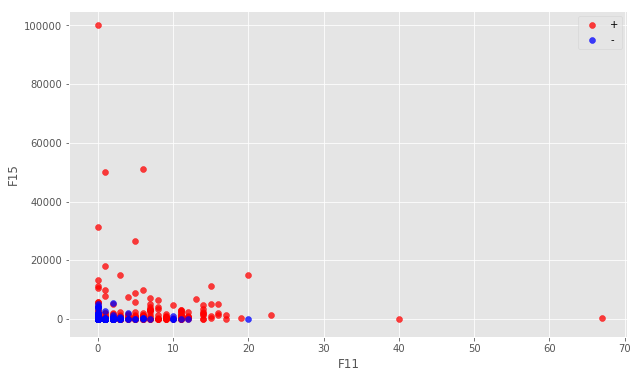

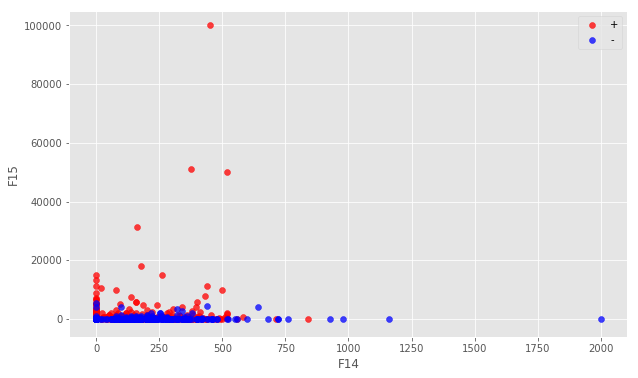

In [29]:
for col1, col2 in combinations(numeric_columns, 2):
    plt.figure(figsize=(10, 6))

    plt.scatter(data[col1][data['class'] == '+'],
                data[col2][data['class'] == '+'],
                alpha=0.75,
                color='red',
                label='+')

    plt.scatter(data[col1][data['class'] == '-'],
                data[col2][data['class'] == '-'],
                alpha=0.75,
                color='blue',
                label='-')

    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.legend(loc='best');

In [11]:
for column in categorical_columns:
    print data[column].unique()

['b' 'a' nan]
['u' 'y' nan 'l']
['g' 'p' nan 'gg']
['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' nan]
['v' 'h' 'bb' 'ff' 'j' 'z' nan 'o' 'dd' 'n']
['t' 'f']
['t' 'f']
['f' 't']
['g' 's' 'p']
['+' '-']
